# FIT5196 Assessment 2

Student Name: VADDE PAVAN KUMAR 
    
Student ID: 29772990 
    
Date: 17-05-2019

Version: 3.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

# TASK 1 : Cleaning the Dirty data  

In [1]:
#importing the packages 
import datetime
import networkx as nx
import pandas as pd
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
#loading the dirty data CSV file 
dirty = pd.read_csv("29772990_dirty_data.csv")
#data.shape # (287, 14)
data = dirty # copying the dirty data into another dataframe 


In [3]:
dirty.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,0.738676,4.912892,5.052265,-36.530882,144.932897,-36.525124,144.937535,15312.552962,3965.428711,52.638641
std,0.760476,2.506511,2.468130,9.916588,0.108728,9.914998,0.099455,16413.319951,3958.340980,116.459231
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,936.000000,209.220000,3.730000
25%,0.000000,3.000000,3.000000,-37.823739,144.928113,-37.823319,144.927461,4891.000000,1251.810000,14.195000
50%,1.000000,5.000000,5.000000,-37.813624,144.966848,-37.814004,144.963280,8006.000000,2287.680000,21.710000
75%,1.000000,7.000000,7.000000,-37.804465,144.993353,-37.804341,144.990943,12348.500000,3863.760000,31.325000
max,3.000000,9.000000,9.000000,37.861835,145.046450,37.821855,145.046450,51032.000000,13204.980000,818.990000


In [4]:
dirty.describe(include=['O'])

,Unnamed: 0,Departure Date,Departure Time,Arrival Time
count,287,287,287,287
unique,287,162,287,287
top,ID1766914306,2018-03-25,05:16:41,13:09:59
freq,1,5,1,1


# Uber Type Cleaning 
Cleaning the Uber Type found that uber type : 3
- Data is cleaned based on the IDS
- if ID is starting with ID1 then change the uber type as 0
- if ID is starting with ID2 then change the uber type as 1
- if ID is starting with ID3 then change the uber type as 2

In [5]:
ids = data['Unnamed: 0']
uber = data['Uber Type']
for i in range(len(uber)):
    if str(ids[i]).startswith("ID1"):
        if uber[i] == 3:
            uber[i] = 0
    if str(ids[i]).startswith("ID3"):
        if uber[i] == 3:
            uber[i] = 1
    if str(ids[i]).startswith("ID5"):
        if uber[i] == 3:
            uber[i] = 2
   

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


# Latitude and Longitude Celaning 
    Latiude and Longitude have -ve and +ve values , we are replacing the +ve values to the -ve values 
    But we can see that there no errors in the longitude data 

In [6]:
data.loc[data['Origin Latitude'] > 0, 'Origin Latitude'] = -abs(data['Origin Latitude'])
data.loc[data['Destination Latitude'] > 0, 'Destination Latitude'] = -abs(data['Destination Latitude'])


# Date modification
    Checking the Departure Date and rearranging them in the proper order 
    have found few errors in the Date column 
    Swaping the data based on the month and day if month is greater than 12
    checking the date range based on the month if days greater than 31 and for few months of 30


In [7]:
#time clenaing 
date = data['Departure Date']
newCol = [] # created the list for storing the modified date 
for date in date:
    year,month,day = date.split("-")
    if int(month) > 12:
        a = int(month)
        month = int(day)
        day = a
        date = year+"-"+"0"+str(month)+"-"+str(day)
        newCol.append(date)
    elif int(month) in [4,6,9,11]:
        if int(day) > 30:
            day = 30
            date = year+"-"+month+"-"+str(day)
            newCol.append(date)
        else:
            newCol.append(date)
    elif int(month) == 2:
        if int(day) > 28:
            day = 28
            date = year+"-"+month+"-"+str(day)
            newCol.append(date)
        else:
            newCol.append(date)
    else:
        newCol.append(date)
data['Departure Date'] = newCol # replacing the list to the column in the data frame 

# Checking whether arrival time is greater than departure time
    Even before correcting the arrival time but we will be checking and swaping the columns between the departure time and    arrival time, if arrivak tine is greater than the departure time 

In [8]:
time1 = data['Departure Time']
time2 = data['Arrival Time']
depart = [] # list is used to store the departure date 
arrival = [] # list used to store the arrival date
for i in range(len(time1)):
    if time1[i] > time2[i]:
        hour,minute,second = time2[i].split(":")
        if hour == "0":
            depart.append(time1[i])
            arrival.append(time2[i])
        else:
            depart.append(time2[i])
            arrival.append(time1[i])
    else:
        depart.append(time1[i])
        arrival.append(time2[i])
data['Departure Time'] = depart # re-assining the list back to the departure time column and replacing the values 
data['Arrival Time'] = arrival #re-assining the list back to the arrival time column and replacing the values 

# Finding the source node and destination node based on the latitude and longitude positions to caluclate journey diatance and travel time
    Merging the data of the two data frames based on the common columns and adding the extra column to the data data frame 

In [9]:
#slicing the source latiude and longitude data from the data data frame and storing in the frame variable 
# slicing the destination latitude and longitude data from the data data frame and storing in the frame1 variable
# reading the data from the nodes and thn edges file 
frame = data.iloc[:,4:6] 
frame1 = data.iloc[:,6:8]
nodes = pd.read_csv("nodes.csv")
edges = pd.read_csv("edges.csv")
#Merging the frame and nodes data and also frame1 and edges data file 
source = pd.merge(frame, nodes, how='left', left_on=['Origin Latitude','Origin Longitude'], right_on = ['lat','lon'])
dest = pd.merge(frame1, nodes, how='left', left_on=['Destination Latitude','Destination Longitude'], right_on = ['lat','lon'])
data['source node'] = source['Unnamed: 0'] # Adding the column to the data frame and storing as the source node 
data['dest node'] = dest['Unnamed: 0'] # Adding the column to the data frame and storing as the destination node

# Caluclating the travel time and journey distance based on dijkstra algorithm

In [10]:
source = data['source node']
destination = data['dest node']
departure = data['Departure Time']
dist = [] # list used to store the shortest distance 
arrival_time = [] # list used to store the arrival time based on the travel time 
travel_time = [] # list used to store the tarvel time based on the shortest distance 
for j in range(len(source)):
    G = nx.from_pandas_edgelist(edges, 'u', 'v', 'distance(m)')
    src = source[j] # fetching the source node data 
    des = destination[j] # fetching the destination node data based on the index position 
    #Shortest Path and the distance based on the dijkstra algorithm 
    d, path = nx.single_source_dijkstra(G,source=src, target=des, weight='distance(m)')
    dist.append(d) # assigning the distance list 
    # now we are caluclating the travel time based on the obtained shortest path 
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    travel_time.append(round(tt,2)) # Assigning to travel time to the list, rounding of the travel time to 2 decimal places 
    
    # we are caluclating the arrival time based on the travel time obtained and we are here assuming that departure time is correct
    time = departure[j] # fecthing the departure time based on the indexing position 
    datetime_object = datetime.datetime.strptime(time, '%H:%M:%S') #converting the data into datatime object 
    c = datetime.timedelta(seconds=tt) 
    final = datetime_object + c
    final = final - datetime.timedelta(microseconds=final.microsecond) #removing the micro seconds from the arrival time 
    a = final.time() # fetching the time from the final date time object and storing in the variable
    # we used time() function becuase we will be getting date and time when we are using date time object 
    arrival_time.append(str(a))# appending the variable to string after converting as string 

#modifying the column values based on the obatined results in the and which are stored in the list 
data['Journey Distance(m)'] = dist
data['Travel Time(s)'] = travel_time
data['Arrival Time'] = arrival_time

# Checking the Origin and Destination Region based on latitude and longitude positions 
We are intially finding the mean based on the origin regions and destination regions from 1 to 9 

In [11]:
# variable a has the means of the regions of Origin Region 
# variable b has the means of the regiond of Destination Region 
# we are considering those mean positions as the center of the Region and checking the 
a = data.groupby(['Origin Region'])['Origin Latitude',  'Origin Longitude'].mean()
b = data.groupby(['Destination Region'])['Destination Latitude',  'Destination Longitude'].mean()
mlat = a['Origin Latitude'] # assigning the means of Origin Latitude to the variable mlat 
mlon = a['Origin Longitude'] # assigning the means of Origin Longitude to the variable mlon
nlat = b['Destination Latitude'] # assigning the means of Destination latitude to the variable nlat
nlon = b['Destination Longitude'] #assigning the means of Destination longitude to the variable nlon 


# We found the means for each origin and strored the means of latitude and longitudes in separate variables.
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            distance = R * c
    Using this formula to caluclate distance between two latitude positions
    ATAN2(y,x) returns the arc tangent of the two numbers x and y. It is similar to calculating the arc tangent of y / x, except that the signs of both arguments are used to determine the quadrant of the result. The result is an angle expressed in radians. To convert from radians to degrees, use the DEGREES function.
    we took the radius of earth as 6378.0 

In [12]:
olat = data['Origin Latitude']
olon = data['Origin Longitude']
so = [] # created the list for source origin 
do = [] # created the list destination Origin 
for i in range(len(olat)):
    R = 6378.0
    d = [] # craeted the list to append distances which are caluclated between different latitude positions 
    for j in range(1,10): 
        lat1 = radians(mlat[j]) 
        lon1 = radians(mlon[j])
        lat2 = radians(olat[i])
        lon2 = radians(olon[i])
        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        d.append(distance)
    # we are enumerating through the list to find the min of distance and just taking the distance 
    (m,i) = min((v,i) for i,v in enumerate(d))
    so.append(i+1) # we are appending the minimum index position to the list by increasing the index position by 1 since 
    #list indices start from 0
# no we are repeating the same for the longitude also    
delat = data['Destination Latitude']
delon = data['Destination Longitude']
for i in range(len(olat)):
    R = 6378.0
    d1 = []
    for j in range(1,10):
        lat1 = radians(nlat[j]) 
        lon1 = radians(nlon[j])
        lat2 = radians(delat[i])
        lon2 = radians(delon[i])
        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        d1.append(distance)
    
    (m,i) = min((v,i) for i,v in enumerate(d1))
    do.append(i+1)

data['Origin Region'] = so # we are replacing the Origin Region columns with list values 
data['Destination Region'] = do # we are replacing the Destination Region columns with list values

In [13]:
data = data.drop(['source node','dest node'],axis=1) # dropping the excess columns from the data frame 
data.to_csv (r'29772990_dirty_data_solution.csv', index = None, header=True) # no we are writing back the cleaned data to the CSV file
data.shape

(287, 14)

The shape of the data frame remains same with 287 * 14 

# TASK 2 :  Missing value imputation

In [14]:
# Read csv file into a pandas dataframe
df = pd.read_csv("29772990_missing_value.csv") # reading the missing value data 
data = pd.read_csv("29772990_dirty_data_solution.csv") # reading the cleaned data file 
# Take a look at the first few rows
df.shape

(112, 14)

In [15]:
data.head() # cleaned data data frame 

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3470400581,1,1,8,-37.819694,144.970898,-37.815834,145.046450,7892.0,2018-07-21,20:31:33,2337.24,21:10:30,23.74
1,ID1798694750,0,1,9,-37.818018,144.969444,-38.110916,144.654173,44086.0,2018-01-11,10:31:37,10617.84,13:28:34,19.72
2,ID1928278235,0,5,1,-37.813955,144.929840,-37.811976,144.963768,4157.0,2018-01-11,18:30:07,1055.04,18:47:42,9.25
3,ID1444983790,0,9,5,-38.110916,144.654173,-37.802878,144.929662,44010.0,2018-05-19,09:19:45,10546.98,12:15:31,25.23
4,ID3595158152,1,4,9,-37.801164,145.009123,-38.110916,144.654173,48432.0,2018-07-12,16:40:47,11741.28,19:56:28,58.97


In [16]:
df.head() # missing data data frame 

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1251966690,NaN,2,4,-37.812283,144.938491,-37.800756,145.018672,8804.0,2018-02-08,13:24:25,2303.82,14:02:48,8.78
1,ID3735552830,1.0,5,3,-37.803748,144.930750,-37.809713,144.987961,5320.0,2018-06-27,15:29:28,1308.00,15:51:16,16.20
2,ID3119025914,1.0,6,2,-37.787442,144.980409,-37.822145,144.950052,5480.0,2018-02-01,07:21:34,1359.84,7:44:13,10.39
3,ID1205309681,NaN,7,3,-37.861835,144.905716,-37.808845,144.983892,9689.0,2018-06-12,03:01:21,3257.34,3:55:38,14.81
4,ID1153083292,NaN,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-06-03,03:53:29,4911.60,5:15:20,18.73


In [17]:
print(df.isnull().sum())

Unnamed: 0                0
Uber Type                20
Origin Region             0
Destination Region        0
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance(m)       0
Departure Date            0
Departure Time            0
Travel Time(s)            0
Arrival Time              0
Fare$                    18
dtype: int64


As we can see that there are: 20 missing values in Uber Type 0 and 18 missing values in fare column

# Replacing the missing values in the Uber Type
replacing the values based on the ID Type

In [18]:
ids = df['Unnamed: 0']
uber = df['Uber Type']
for i in range(len(uber)):
    u = str(uber[i])
    if str(ids[i]).startswith("ID1"): 
        if u == "nan": 
            uber[i] = 0 # if ID starts with ID1 then we are marking the Uber Type as 0
    if str(ids[i]).startswith("ID3"):
        if u == "nan":
            uber[i] = 1 #if ID starts with ID3 then we are marking the Uber Type as 1
    if str(ids[i]).startswith("ID5"):
        if u == "nan":
            uber[i] = 2 #if ID starts with ID5 then we are marking the Uber Type as 2

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


# Categorical representation for Departure Time
    Time of the departure. We know that the Uber company has a
    specific rule to define a discrete number for 
    morning (i.e. 0) (6:00:00 - 11:59:59), 
    afternoon (i.e. 1) (12:00:00 - 20:59:59),
    night (i.e. 2) (21:00 - 5:59:59) 
    to calculate the fare.

In [19]:
# function returns the categorical value 0,1,2 based on the hour value as the input provided 
def get_part_of_day(hour):
    return (
        "0" if 6 <= hour < 12 # returns 0 if the hour range is in between 6 and 11
        else
        "1" if 12 <= hour <= 21 # returns 1 if the hour range is in between 12 and 21
        else
        "2"    # returns 2 if the hour range is in between 21 and 5
    )
# If you want to use current hour:
# from datetime import datetime
# h = datetime.now().hour
dat = data['Departure Time'] # storing the values of Departure Time into the dat variable 
for i in range(len(dat)):
    h = dat[i] # picking the value from the list of times 
    date = datetime.datetime.strptime(h, "%H:%M:%S") # converting the string value to the data time object 
    a = get_part_of_day(date.hour) #picking only the hour from the time and calling the function 
    data['Departure Time'][i] = int(a)  #replacing the value in the column with the returned categorical value 
dat1 = df['Departure Time'] # repating the same with the missing data 
for i in range(len(dat1)):
    h = dat1[i]
    date = datetime.datetime.strptime(h, "%H:%M:%S")
    a = get_part_of_day(date.hour)
    df['Departure Time'][i] = int(a)

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Categorical representation of Departure Date
    Date of the departure. We know that the price is different on weekdays compared to weekends.
    Monday till Friday are considered as weekdays and reperesnted with 0 
    Saturday and Sunday are considered as weekends and reperesnted with 1

In [20]:
# Function returns the categorical value 0 and 1 based on weekday and weekend 
def get_day(hour):
    return (
        "0" if 0 <= hour <= 4 # Monday till Friday are considered as 0
        else # staurday and sunday are considered as 1
        "1"           
    )

dep = data['Departure Date'] # picking the values of the cleaned data 
for i in range(len(dep)):
    year,month,day = dep[i].split("-") # splitting the string into year month and  day
    today = datetime.datetime(int(year), int(month), int(day)) # converting them to the date time object 
    a = get_day(today.weekday()) #Return the day of the week as an integer, where Monday is 0 and Sunday is 6.
    data['Departure Date'][i] = int(a) # replacing the column value with the categorical value
dep1 = df['Departure Date'] #picking the values from the missing datafrmae 
for i in range(len(dep1)):
    year,month,day = dep1[i].split("-")
    today = datetime.datetime(int(year), int(month), int(day))
    a = get_day(today.weekday()) # Return the day of the week as an integer, where Monday is 0 and Sunday is 6.
    df['Departure Date'][i] = int(a) # replacing the column value with the categorical value

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Perform the Regreesion Analyis to predict the fare values
- splitting the data based on the uber type 
- Declaring the Linear Regression for each of the uber type 
- Creating the Test split function, means creating the source variables and target variable 
  here our source varibales will be uber type, Journey Distance, Departure Date, Departure Time, Travel Time
  and our target variable will be Fare
- fitting the x and y values to the regression coefficient to caluclate the vlaues 

# Where the Fare is dependent on the particular columns
    -Uber Type
    -Journey Distance(m)
    -Departure Date
    -Departure Time
    -Travel Time(s)
    We are dropping the other columns other than the dependent colums of fare

In [21]:
#dropping the columns that are not correlated to the fair column from the cleaned data 
#data is the cleaned data data frame
dropped =  data.drop(['Unnamed: 0','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Arrival Time'],axis=1)
lm_fitting_df0 = dropped[dropped['Uber Type'] == 0] # varibale has the data with the Uber Type as 0
lm_fitting_df1 = dropped[dropped['Uber Type'] == 1] # varibale has the data with the Uber Type as 1
lm_fitting_df2 = dropped[dropped['Uber Type'] == 2] # variable has the data with the Uber Tyoe as 2

In [22]:
# creating the regression varibale for each uber type 
reg0 = LinearRegression() 
reg1 = LinearRegression()
reg2 = LinearRegression()

In [23]:
# Creating the Test split functions for each uber type
X0_train, X0_test, y0_train, y0_test = train_test_split(lm_fitting_df0[['Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)']],lm_fitting_df0['Fare$'],random_state = 100)
X1_train, X1_test, y1_train, y1_test = train_test_split(lm_fitting_df1[['Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)']],lm_fitting_df1['Fare$'],random_state = 100)
X2_train, X2_test, y2_train, y2_test = train_test_split(lm_fitting_df2[['Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)']],lm_fitting_df2['Fare$'],random_state = 100)

In [24]:
# regression fit 
reg0.fit(X0_train,y0_train)
reg1.fit(X1_train,y1_train)
reg2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

    Caluclating the r-score for the models

-R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean. 100% indicates that the model explains all the variability of the response data around its mean.

In [25]:
a = reg0.score(X0_test,y0_test)
b = reg1.score(X1_test,y1_test)
c = reg2.score(X2_test,y2_test)
print ('r-squared for this model of Uber Type 0 = ',a)
print ('r-squared for this model of Uber Type 1 = ',b)
print ('r-squared for this model of Uber Type 2 = ',c)

r-squared for this model of Uber Type 0 =  0.9618194543145867
r-squared for this model of Uber Type 1 =  0.959306493626307
r-squared for this model of Uber Type 2 =  0.9930897800372022


    Repaeting the same for the missing value data
    Extarcting the data of each uber type for only the missing values 
    predicting the fare value for the missing data by using model created above
    reg0 - model for uber type 0
    reg1 - model for uber type 1
    reg2 - model for uber type 2

In [26]:
missing = df.drop(['Unnamed: 0','Origin Region','Destination Region','Origin Latitude','Origin Longitude','Destination Latitude','Destination Longitude','Arrival Time',],axis=1)
null_data = missing[missing['Fare$'].isnull()] # considering the data with the null values in the fare column 
lm_fitting_data0 = null_data[null_data['Uber Type'] == 0] # variable with data of uber type as 0 and fare column has null values 
lm_fitting_data1 = null_data[null_data['Uber Type'] == 1] # variable with data of uber type as 1 and fare column has null values
lm_fitting_data2 = null_data[null_data['Uber Type'] == 2] # variable with data of uber type as 2 and fare column has null values


In [27]:
# predicting the fare values with the cleaned data model created 
miss0 = reg0.predict(lm_fitting_data0[['Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)']])
miss1 = reg1.predict(lm_fitting_data1[['Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)']])
miss2 = reg2.predict(lm_fitting_data2[['Journey Distance(m)','Departure Date','Departure Time','Travel Time(s)']])
lm_fitting_data0['Fare$'] = miss0 # replacing the predicted values of uber type 0 in the null positions 
lm_fitting_data1['Fare$'] = miss1 # replacing the predicted values of uber type 1 in the null positions 
lm_fitting_data2['Fare$'] = miss2 # replacing the predicted values of uber type 2 in the null positions 
print(miss2)

[258.58652336 119.28801765 730.99996135 107.73320567  72.57072368]


C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

Imputing the missing data based on their index positions 

In [28]:
# now we are predicted fare values to the original data frame 
miss0=list(miss0)
n=0
for value in list(lm_fitting_data0.index):
    df['Fare$'][value]=round(miss0[n],2) 
    n+=1
miss1=list(miss1)
n=0
for value in list(lm_fitting_data1.index):
    df['Fare$'][value]=round(miss1[n],2) 
    n+=1
n=0
miss2=list(miss2)
for value in list(lm_fitting_data2.index):
    df['Fare$'][value]=round(miss2[n],2) 
    n+=1

C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\V.PAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
print(df.isnull().sum())

Unnamed: 0               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
dtype: int64


we can see that there are no more missing values in the data, missing values have been imputed with the predicted data

In [30]:
df.to_csv (r'29772990.missing_value_solution.csv', index = None, header=True) # writing the data to csv file 
df.shape

(112, 14)

# TASK 3 : Detecing the outliers and removing from the data 

Using the three data files to detect the outliers

- Outliers file 
- cleaned data file 
- missing data file 

In [31]:
#reading the data from the three files 
outliers  = pd.read_csv("29772990_outliers.csv")
missing = pd.read_csv("29772990.missing_value_solution.csv")
cleaned = pd.read_csv("29772990_dirty_data_solution.csv")
outliers.head()

,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID5682529146,2,1,8,-37.807509,144.962853,-37.815834,145.046450,7465.0,2018-05-24,09:44:18,2176.74,10:20:34,231.300
1,1,ID3212336499,1,4,2,-37.810420,145.010473,-37.817380,144.948896,6397.0,2018-01-03,10:33:33,1498.56,10:58:31,9.240
2,2,ID1579717413,0,8,3,-37.815834,145.046450,-37.818663,144.996477,5177.0,2018-06-06,02:21:25,1591.20,2:47:56,16.290
3,3,ID1565599989,0,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-07-12,01:38:34,12681.06,5:09:55,34.200
4,4,ID5706453903,2,1,3,-37.812280,144.938096,-37.810542,144.980889,4256.0,2018-04-05,08:30:52,1066.86,8:48:38,59.665


Combining all the three data frames into the single data frame

In [32]:
combine = pd.concat([outliers,missing,cleaned],ignore_index=True)

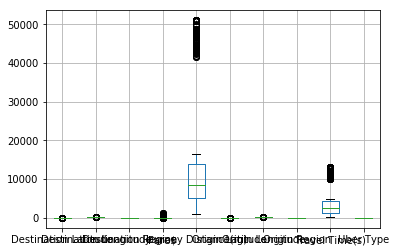

In [33]:
combine.boxplot()

Plotting the box plot for all three uber types

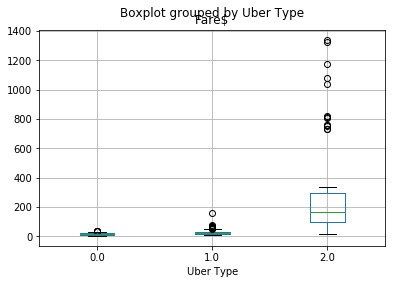

In [34]:
combine.boxplot(column='Fare$', by = 'Uber Type')

Plotting the boxplot with each uber type separately

In [35]:
data0 = combine[combine['Uber Type'] == 0]
data1 = combine[combine['Uber Type'] == 1]
data2 = combine[combine['Uber Type'] == 2]

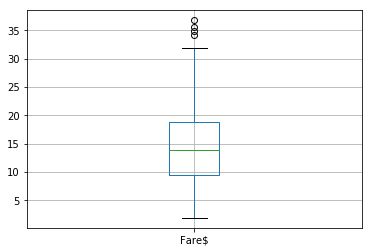

In [36]:
# Uber type 0
data0.boxplot(column='Fare$') 

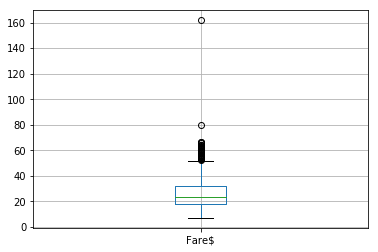

In [37]:
# Uber Type 1 
data1.boxplot(column='Fare$')

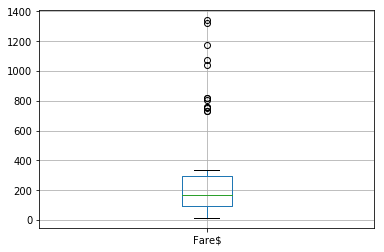

In [38]:
# Uber Type 2
data2.boxplot(column='Fare$')

Caluclating the percentile for each uber type

- 25% 
- 50%
- 75%

In [39]:
data0_q1 = data0['Fare$'].quantile(.25)
data0_q2 = data0['Fare$'].quantile(.50)
data0_q3 = data0['Fare$'].quantile(.75)
data1_q1 = data1['Fare$'].quantile(.25)
data1_q2 = data1['Fare$'].quantile(.50)
data1_q3 = data1['Fare$'].quantile(.75)
data2_q1 = data2['Fare$'].quantile(.25)
data2_q2 = data2['Fare$'].quantile(.50)
data2_q3 = data2['Fare$'].quantile(.75)

Caluclating the Inter Quartile Rnage And Upper Whisker

- IQR = Q3 - Q1
- Upper Whisker = 1.5*IQR + Q3

In [40]:
iqr0 = data0_q3 - data0_q1
iqr1 = data1_q3 - data1_q1
iqr2 = data2_q3 - data2_q1

upper0 = (1.5*iqr0) + data0_q3
upper1 = (1.5*iqr1) + data1_q3
upper2 = (1.5*iqr2) + data2_q3

print("upper whisker range for uber type: 0 = ", upper0)
print("upper whisker range for uber type: 1 = ", upper1)
print("upper whisker range for uber type: 2 = ", upper2)

upper whisker range for uber type: 0 =  33.17124999999999
upper whisker range for uber type: 1 =  52.45375
upper whisker range for uber type: 2 =  598.2500000000001


In [41]:
outliers.shape

(89, 15)

We can see that data frame has 89*15 shape 

Removing the outliers based on the Upper Whisker, if the value is more than the caluaclted upper whisker then we are removing them from the data
    - removing the values for the uber type 0 where fare is more than 33.17
    - removing the values for the uber type 1 where fare is more than 53.11
    - removing the values for the uber type 2 where fare is more than 595.465

In [42]:
#Uber type 0
outliers=outliers[np.logical_not(np.logical_and(outliers['Uber Type']==0,outliers['Fare$']>upper0))] 

In [43]:
#Uber type 1
outliers=outliers[np.logical_not(np.logical_and(outliers['Uber Type']==1,outliers['Fare$']>upper1))]

In [44]:
#Uber type 2
outliers=outliers[np.logical_not(np.logical_and(outliers['Uber Type']==2,outliers['Fare$']>upper2))]

In [45]:
outliers.shape

(79, 15)

now we check the data frame has the shape 79 * 15 
so we can see that there are 10 otliers and they are removed from the outliers data 

In [46]:
outliers.to_csv (r'29772990_outliers_solution.csv', index = None, header=True) # writing the data to CSV file 

End of the Assignment 

Refrences:
    -  Lecture slides
    - Alexandria
    - stack overflow
